### Carga de modulos

In [1]:
# Data Wrangling
import folium
import numpy as np
import pandas as pd
import re
# Data Viz
import plotly.express as px
#import cufflinks as cf

# Data preprocessing
from sklearn.feature_selection import SelectKBest, f_regression,f_classif

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import (LinearRegression, Lars, ElasticNet, 
                                  Lasso, BayesianRidge)

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Model performance
from sklearn.metrics import roc_auc_score

# Modeling
from sklearn.linear_model import LogisticRegression
# Enviroment setup
# cf.go_offline()
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


### Lectura de datos

In [3]:
df  = pd.read_csv("listings.csv")
df.head(2)

id                         listing_url       scrape_id last_scraped  \
0  35797  https://www.airbnb.com/rooms/35797  20250927041820   2025-09-27   
1  44616  https://www.airbnb.com/rooms/44616  20250927041820   2025-09-28   

        source          name  \
0  city scrape   Villa Dante   
1  city scrape  Condesa Haus   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   

                               neighborhood_overview  \
0  Santa Fe Shopping Mall, Interlomas Park and th...   
1                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f395ab78-1185...   153786   
1  https://a0.muscache.com/pictures/251410/ec75fe...   196253   

                                   host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/153786      Dici  2010-06-28   
1  https://www.airbnb.com/users/show/196253  Fernando  2010-08-09   

         host_location                                         host_about  \
0  Mexico City, Mexico  Master in visual arts, film photography & Mark...   
1  Mexico City, Mexico  Condesa Haus Rentals  offers independent  stud...   

  host_response_time host_response_rate host_acceptance_rate  \
0                NaN                NaN                  NaN   
1     within an hour               100%                  92%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/00de1...   
1                 f  https://a0.muscache.com/im/users/196253/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/00de1...                NaN   
1  https://a0.muscache.com/im/users/196253/profil...            Condesa   

   host_listings_count  host_total_listings_count  \
0               1.0000                     1.0000   
1              13.0000                    13.0000   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   
1  ['email', 'phone', 'work_email']                    t   

  host_identity_verified              neighbourhood neighbourhood_cleansed  \
0                      t  Mexico City, D.f., Mexico  Cuajimalpa de Morelos   
1                      t                        NaN             Cuauhtémoc   

   neighbourhood_group_cleansed  latitude  longitude property_type  \
0                           NaN   19.3828   -99.2718  Entire villa   
1                           NaN   19.4116   -99.1779   Entire home   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms   beds  \
0  Entire home/apt             2     1.0000         1 bath    1.0000 1.0000   
1  Entire home/apt            14     5.5000      5.5 baths    5.0000 8.0000   

                                           amenities       price  \
0  ["Garden view", "Resort access", "Washer", "Co...   $3,673.00   
1  ["Piano", "Patio or balcony", "Wifi", "Refrige...  $18,000.00   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0               1               7                  1.0000   
1               1             180                  1.0000   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                  1.0000                  7.0000                  7.0000   
1                  1.0000                180.0000                180.0000   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
0                  1.0000                  7.0000               NaN   
1                  1.0000                180.0000               NaN   

  has_availability  availability_30  availability_60  availability_90  \
0                t               28               58               88   
1                t               25               55   

In [4]:
df.shape

(27051, 79)

In [5]:
df.describe().T

count  \
id                                           27051.0000   
scrape_id                                    27051.0000   
host_id                                      27051.0000   
host_listings_count                          27045.0000   
host_total_listings_count                    27045.0000   
neighbourhood_group_cleansed                     0.0000   
latitude                                     27051.0000   
longitude                                    27051.0000   
accommodates                                 27051.0000   
bathrooms                                    23555.0000   
bedrooms                                     26071.0000   
beds                                         23545.0000   
minimum_nights                               27051.0000   
maximum_nights                               27051.0000   
minimum_minimum_nights                       27040.0000   
maximum_minimum_nights                       27040.0000   
minimum_maximum_nights                       27040.0000   
maximum_maximum_nights                       27040.0000   
minimum_nights_avg_ntm                       27051.0000   
maximum_nights_avg_ntm                       27051.0000   
calendar_updated                                 0.0000   
availability_30                              27051.0000   
availability_60                              27051.0000   
availability_90                              27051.0000   
availability_365                             27051.0000   
number_of_reviews                            27051.0000   
number_of_reviews_ltm                        27051.0000   
number_of_reviews_l30d                       27051.0000   
availability_eoy                             27051.0000   
number_of_reviews_ly                         27051.0000   
estimated_occupancy_l365d                    27051.0000   
estimated_revenue_l365d                      23567.0000   
review_scores_rating                         23650.0000   
review_scores_accuracy                       23649.0000   
review_scores_cleanliness                    23649.0000   
review_scores_checkin                        23649.0000   
review_scores_communication                  23649.0000   
review_scores_location                       23649.0000   
review_scores_value                          23649.0000   
license                                          0.0000   
calculated_host_listings_count               27051.0000   
calculated_host_listings_count_entire_homes  27051.0000   
calculated_host_listings_count_private_rooms 27051.0000   
calculated_host_listings_count_shared_rooms  27051.0000   
reviews_per_month                            23650.0000   

                                                                mean  \
id                                           700355582609886464.0000   
scrape_id                                        20250927041820.0000   
host_id                                               242943885.0206   
host_listings_count                                          24.6048   
host_total_listings_count                                    33.7716   
neighbourhood_group_cleansed                                     NaN   
latitude                                                     19.4055   
longitude                                                   -99.1654   
accommodates                                                  3.3393   
bathrooms                                                     1.4517   
bedrooms                                                      1.5537   
beds                                                          1.9617   
minimum_nights                                                4.5809   
maximum_nights                                              480.0767   
minimum_minimum_nights                                        4.0129   
maximum_minimum_nights                                        5.0126   
minimum_maximum_nights                                   794868.2528   
maximum_maximum_nights                 

In [6]:
df.columns = [column.lower() for column in df.columns.to_list()]


In [7]:
df.id= df.id.astype(str)
df.set_index(keys="id",inplace=True)

### Unidad muestral
#### Cada registro representa un listing (alojamiento) de Airbnb observado

In [8]:
target_regresor = df['price']
target_cla = ""

### Funciones auxiliares

In [9]:

def evaluar_modelos_regresion(X_train, X_test, y_train, y_test):
    """
    Entrena múltiples modelos de regresión y devuelve un DataFrame 
    con las métricas R2 y MSE para entrenamiento y prueba.
    """
    
    # Definición de los modelos según tu lista
    modelos = {
        "Regresión Lineal": LinearRegression(),
        "Regresión LARS": Lars(),
        "Red Elástica (Elastic Net)": ElasticNet(),
        "Regresión Lasso": Lasso(),
        "Regresión de Cresta Bayesiana": BayesianRidge()
    }
    
    resultados = []
    
    for nombre, modelo in modelos.items():
        # Entrenamiento
        modelo.fit(X_train, y_train)
        
        # Predicciones
        preds_train = modelo.predict(X_train)
        preds_test = modelo.predict(X_test)
        
        # Cálculo de métricas
        r2_train = r2_score(y_train, preds_train)
        r2_test = r2_score(y_test, preds_test)
        mse_test = mean_squared_error(y_test, preds_test)
        
        # Guardar resultados
        resultados.append({
            "Modelo": nombre,
            "R2 Train": round(r2_train, 4),
            "R2 Test": round(r2_test, 4),
            "MSE Test": round(mse_test, 4),
            "Diferencia R2 (Overfitting)": round(r2_train - r2_test, 4)
        })
    
    # Crear DataFrame y ordenar por mejor R2 en Test
    df_resultados = pd.DataFrame(resultados).sort_values(by="R2 Test", ascending=False)
    
    return df_resultados




def evaluar_modelos_pro(X_train, X_test, y_train, y_test):
    """
    Versión corregida: 
    - Cambiado n_iter por max_iter en BayesianRidge.
    - Limpieza automática de multicolinealidad.
    - Optimización por GridSearchCV.
    """
    
    # 1. TRATAMIENTO DE MULTICOLINEALIDAD
    # En series de tiempo con ventanas (1m, 2m, 3m), las columnas se parecen mucho.
    # Borramos las que tengan una correlación mayor al 95%.
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    X_train_clean = X_train.drop(columns=to_drop)
    X_test_clean = X_test.drop(columns=to_drop)
    
    print(f"--- Limpieza de Datos ---")
    print(f"Columnas eliminadas por redundancia: {len(to_drop)}")
    print(f"Columnas finales para entrenar: {X_train_clean.shape[1]}")
    print("-" * 30)

    # 2. CONFIGURACIÓN DE MODELOS E HIPERPARÁMETROS
    # Corregido: 'max_iter' en lugar de 'n_iter'
    config = {
        "Regresión Lineal": (LinearRegression(), {}),
        
        "Regresión LARS": (Lars(), {
            'n_nonzero_coefs': [10, 50, 100, 500]
        }),
        
        "Red Elástica (Elastic Net)": (ElasticNet(), {
            'alpha': [0.1, 1.0, 5.0],
            'l1_ratio': [0.1, 0.5, 0.9]
        }),
        
        "Regresión Lasso": (Lasso(), {
            'alpha': [0.01, 0.1, 1.0]
        }),
        
        "Bayesian Ridge": (BayesianRidge(), {
            'max_iter': [300, 600], # <--- CORREGIDO AQUÍ
            'alpha_1': [1e-6, 1e-4]
        })
    }
    
    resultados = []
    
    for nombre, (modelo, params) in config.items():
        try:
            # Entrenamiento con validación cruzada para encontrar el mejor parámetro
            grid = GridSearchCV(modelo, params, cv=3, scoring='r2', n_jobs=-1)
            grid.fit(X_train_clean, y_train)
            
            mejor_modelo = grid.best_estimator_
            
            # Predicciones
            p_tr = mejor_modelo.predict(X_train_clean)
            p_te = mejor_modelo.predict(X_test_clean)
            
            # Métricas
            r2_tr = r2_score(y_train, p_tr)
            r2_te = r2_score(y_test, p_te)
            rmse = np.sqrt(mean_squared_error(y_test, p_te))
            
            resultados.append({
                "Modelo": nombre,
                "R2 Test": round(r2_te, 4),
                "R2 Train": round(r2_tr, 4),
                "RMSE (Error)": round(rmse, 2),
                "Estabilidad": round(r2_te / r2_tr, 2) if r2_tr > 0 else 0,
                "Mejores Params": str(grid.best_params_)
            })
        except Exception as e:
            print(f"Error en {nombre}: {e}")
        
    # Crear DataFrame y ordenar
    df_res = pd.DataFrame(resultados).sort_values(by="R2 Test", ascending=False)
    
    return df_res

def evaluar_clasificadores_pro(X_train, X_test, y_train, y_test):
    """
    Función para modelos de clasificación. 
    Incluye escalamiento, limpieza de multicolinealidad y optimización.
    """
    
    # 1. LIMPIEZA DE MULTICOLINEALIDAD (Esencial para Logística y Bayes)
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    X_train_c = X_train.drop(columns=to_drop)
    X_test_c = X_test.drop(columns=to_drop)

    # 2. ESCALAMIENTO (Obligatorio para KNN y Redes Neuronales)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_c)
    X_test_scaled = scaler.transform(X_test_c)

    # 3. CONFIGURACIÓN DE MODELOS
    config = {
        "Regresión Logística": (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
        "Naive Bayes": (GaussianNB(), {}),
        "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
        "Árbol de Decisión": (DecisionTreeClassifier(), {'max_depth': [5, 10, None]}),
        "Red Neuronal (MLP)": (MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(50,), (100,)]}),
        "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [10, None]}),
        "AdaBoost": (AdaBoostClassifier(), {'n_estimators': [50, 100]}),
        "Gradient Boosting": (GradientBoostingClassifier(), {'learning_rate': [0.01, 0.1]}),
    }

    resultados = []

    for nombre, (modelo, params) in config.items():
        try:
            # Entrenamiento con búsqueda de parámetros
            grid = GridSearchCV(modelo, params, cv=3, scoring='f1', n_jobs=-1)
            grid.fit(X_train_scaled, y_train)
            
            mejor_modelo = grid.best_estimator_
            preds = mejor_modelo.predict(X_test_scaled)
            
            # Métricas
            acc = accuracy_score(y_test, preds)
            f1 = f1_score(y_test, preds)
            
            # Solo calcular AUC si el modelo tiene predict_proba
            try:
                probs = mejor_modelo.predict_proba(X_test_scaled)[:, 1]
                auc = roc_auc_score(y_test, probs)
            except:
                auc = np.nan

            resultados.append({
                "Modelo": nombre,
                "Accuracy (Exactitud)": round(acc, 4),
                "F1 Score (Equilibrio)": round(f1, 4),
                "ROC AUC (Separación)": round(auc, 4),
                "Mejores Params": str(grid.best_params_)
            })
        except Exception as e:
            print(f"Error en {nombre}: {e}")

    df_res = pd.DataFrame(resultados).sort_values(by="F1 Score (Equilibrio)", ascending=False)
    return df_res


### Data wrangling

In [10]:
df.head(2)

listing_url       scrape_id last_scraped  \
id                                                                       
35797  https://www.airbnb.com/rooms/35797  20250927041820   2025-09-27   
44616  https://www.airbnb.com/rooms/44616  20250927041820   2025-09-28   

            source          name  \
id                                 
35797  city scrape   Villa Dante   
44616  city scrape  Condesa Haus   

                                             description  \
id                                                         
35797  Dentro de Villa un estudio de arte con futon, ...   
44616  A new concept of hosting in mexico through a b...   

                                   neighborhood_overview  \
id                                                         
35797  Santa Fe Shopping Mall, Interlomas Park and th...   
44616                                                NaN   

                                             picture_url  host_id  \
id                                                                  
35797  https://a0.muscache.com/pictures/f395ab78-1185...   153786   
44616  https://a0.muscache.com/pictures/251410/ec75fe...   196253   

                                       host_url host_name  host_since  \
id                                                                      
35797  https://www.airbnb.com/users/show/153786      Dici  2010-06-28   
44616  https://www.airbnb.com/users/show/196253  Fernando  2010-08-09   

             host_location                                         host_about  \
id                                                                              
35797  Mexico City, Mexico  Master in visual arts, film photography & Mark...   
44616  Mexico City, Mexico  Condesa Haus Rentals  offers independent  stud...   

      host_response_time host_response_rate host_acceptance_rate  \
id                                                                 
35797                NaN                NaN                  NaN   
44616     within an hour               100%                  92%   

      host_is_superhost                                 host_thumbnail_url  \
id                                                                           
35797                 f  https://a0.muscache.com/im/pictures/user/00de1...   
44616                 f  https://a0.muscache.com/im/users/196253/profil...   

                                        host_picture_url host_neighbourhood  \
id                                                                            
35797  https://a0.muscache.com/im/pictures/user/00de1...                NaN   
44616  https://a0.muscache.com/im/users/196253/profil...            Condesa   

       host_listings_count  host_total_listings_count  \
id                                                      
35797               1.0000                     1.0000   
44616              13.0000                    13.0000   

                     host_verifications host_has_profile_pic  \
id                                                             
35797  ['email', 'phone', 'work_email']                    t   
44616  ['email', 'phone', 'work_email']                    t   

      host_identity_verified              neighbourhood  \
id                                                        
35797                      t  Mexico City, D.f., Mexico   
44616                      t                        NaN   

      neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  \
id                                                                     
35797  Cuajimalpa de Morelos                           NaN   19.3828   
44616             Cuauhtémoc                           NaN   19.4116   

       longitude property_type        room_type  accommodates  bathrooms  \
id                                                                         
35797   -99.2718  Entire villa  Entire home/apt             2     1.0000   
44616   -99.1779   Entire home  Entire home/apt            14     5.

In [11]:
delete_columns = ['listing_url','scrape_id','last_scraped','name','picture_url','host_id','host_location','host_thumbnail_url','host_picture_url','host_neighbourhood','neighbourhood','neighbourhood_cleansed','property_type','room_type','calendar_last_scraped','first_review','last_review']
df.drop(columns=delete_columns,axis=1,inplace=True)
df.head()

source                                        description  \
id                                                                          
35797      city scrape  Dentro de Villa un estudio de arte con futon, ...   
44616      city scrape  A new concept of hosting in mexico through a b...   
56074      city scrape  This great apartment is located in one of the ...   
67703  previous scrape  Comfortably furnished, sunny, 2 bedroom apt., ...   
70644  previous scrape  COYOACAN designer studio quiet & safe! well eq...   

                                   neighborhood_overview  \
id                                                         
35797  Santa Fe Shopping Mall, Interlomas Park and th...   
44616                                                NaN   
56074  Very traditional neighborhood with all service...   
67703                                                NaN   
70644  Coyoacan is a beautiful neighborhood famous fo...   

                                       host_url host_name  host_since  \
id                                                                      
35797  https://www.airbnb.com/users/show/153786      Dici  2010-06-28   
44616  https://www.airbnb.com/users/show/196253  Fernando  2010-08-09   
56074  https://www.airbnb.com/users/show/265650     Maris  2010-10-19   
67703  https://www.airbnb.com/users/show/334451  Nicholas  2011-01-04   
70644  https://www.airbnb.com/users/show/212109    Trisha  2010-08-24   

                                              host_about  host_response_time  \
id                                                                             
35797  Master in visual arts, film photography & Mark...                 NaN   
44616  Condesa Haus Rentals  offers independent  stud...      within an hour   
56074  I am a University Professor now retired after ...        within a day   
67703  I am a journalist writing about food, (book an...  within a few hours   
70644  I am a documentary film maker & photo curator,...  within a few hours   

      host_response_rate host_acceptance_rate host_is_superhost  \
id                                                                
35797                NaN                  NaN                 f   
44616               100%                  92%                 f   
56074               100%                 100%                 t   
67703                88%                  43%                 f   
70644               100%                  89%                 t   

       host_listings_count  host_total_listings_count  \
id                                                      
35797               1.0000                     1.0000   
44616              13.0000                    13.0000   
56074               1.0000                     5.0000   
67703               3.0000                     4.0000   
70644               3.0000                     4.0000   

                     host_verifications host_has_profile_pic  \
id                                                             
35797  ['email', 'phone', 'work_email']                    t   
44616  ['email', 'phone', 'work_email']                    t   
56074                ['email', 'phone']                    t   
67703                ['email', 'phone']                    t   
70644  ['email', 'phone', 'work_email']                    t   

      host_identity_verified  neighbourhood_group_cleansed  latitude  \
id                                                                     
35797                      t                           NaN   19.3828   
44616                      t                           NaN   19.4116   
56074                      t                           NaN   19.4398   
67703                      t                           NaN   19.4115   
70644                      t                           NaN   19.3545   

       longitude  accommodates  bathrooms bathrooms_text  bedrooms   beds  \
id                                                                          
3579

In [12]:
df.drop(columns=['host_url','host_name','host_verifications','neighborhood_overview','source','host_about','amenities','description','host_response_time','host_since'],axis = 1 ,inplace=True)
df.head()

host_response_rate host_acceptance_rate host_is_superhost  \
id                                                                
35797                NaN                  NaN                 f   
44616               100%                  92%                 f   
56074               100%                 100%                 t   
67703                88%                  43%                 f   
70644               100%                  89%                 t   

       host_listings_count  host_total_listings_count host_has_profile_pic  \
id                                                                           
35797               1.0000                     1.0000                    t   
44616              13.0000                    13.0000                    t   
56074               1.0000                     5.0000                    t   
67703               3.0000                     4.0000                    t   
70644               3.0000                     4.0000                    t   

      host_identity_verified  neighbourhood_group_cleansed  latitude  \
id                                                                     
35797                      t                           NaN   19.3828   
44616                      t                           NaN   19.4116   
56074                      t                           NaN   19.4398   
67703                      t                           NaN   19.4115   
70644                      t                           NaN   19.3545   

       longitude  accommodates  bathrooms bathrooms_text  bedrooms   beds  \
id                                                                          
35797   -99.2718             2     1.0000         1 bath    1.0000 1.0000   
44616   -99.1779            14     5.5000      5.5 baths    5.0000 8.0000   
56074   -99.1560             2     1.0000         1 bath    1.0000 1.0000   
67703   -99.1686             4        NaN         1 bath    2.0000    NaN   
70644   -99.1622             2        NaN         1 bath    1.0000    NaN   

            price  minimum_nights  maximum_nights  minimum_minimum_nights  \
id                                                                          
35797   $3,673.00               1               7                  1.0000   
44616  $18,000.00               1             180                  1.0000   
56074     $591.00              15             250                 15.0000   
67703         NaN               2              30                  2.0000   
70644         NaN               3             180                  3.0000   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
id                                                                              
35797                  1.0000                  7.0000                  7.0000   
44616                  1.0000                180.0000                180.0000   
56074                 15.0000                250.0000                250.0000   
67703                  2.0000                 30.0000                 30.0000   
70644                  4.0000                180.0000                180.0000   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
id                                                                        
35797                  1.0000                  7.0000               NaN   
44616                  1.0000                180.0000               NaN   
56074                 15.0000                250.0000               NaN   
67703                  2.0000                 30.0000               NaN   
70644                  3.4000                180.0000               NaN   

      has_availability  availability_30  availability_60  availability_90  \
id                                                                          
35797                t               28               58               88   
44616                t               25               55               85   
56

In [13]:
df.isnull().sum()/df.shape[0]

host_response_rate                             0.1462
host_acceptance_rate                           0.1047
host_is_superhost                              0.0616
host_listings_count                            0.0002
host_total_listings_count                      0.0002
host_has_profile_pic                           0.0002
host_identity_verified                         0.0002
neighbourhood_group_cleansed                   1.0000
latitude                                       0.0000
longitude                                      0.0000
accommodates                                   0.0000
bathrooms                                      0.1292
bathrooms_text                                 0.0015
bedrooms                                       0.0362
beds                                           0.1296
price                                          0.1288
minimum_nights                                 0.0000
maximum_nights                                 0.0000
minimum_minimum_nights      

In [14]:
df.drop(columns='neighbourhood_group_cleansed',axis=1,inplace=True)

In [15]:
df.head()

host_response_rate host_acceptance_rate host_is_superhost  \
id                                                                
35797                NaN                  NaN                 f   
44616               100%                  92%                 f   
56074               100%                 100%                 t   
67703                88%                  43%                 f   
70644               100%                  89%                 t   

       host_listings_count  host_total_listings_count host_has_profile_pic  \
id                                                                           
35797               1.0000                     1.0000                    t   
44616              13.0000                    13.0000                    t   
56074               1.0000                     5.0000                    t   
67703               3.0000                     4.0000                    t   
70644               3.0000                     4.0000                    t   

      host_identity_verified  latitude  longitude  accommodates  bathrooms  \
id                                                                           
35797                      t   19.3828   -99.2718             2     1.0000   
44616                      t   19.4116   -99.1779            14     5.5000   
56074                      t   19.4398   -99.1560             2     1.0000   
67703                      t   19.4115   -99.1686             4        NaN   
70644                      t   19.3545   -99.1622             2        NaN   

      bathrooms_text  bedrooms   beds       price  minimum_nights  \
id                                                                  
35797         1 bath    1.0000 1.0000   $3,673.00               1   
44616      5.5 baths    5.0000 8.0000  $18,000.00               1   
56074         1 bath    1.0000 1.0000     $591.00              15   
67703         1 bath    2.0000    NaN         NaN               2   
70644         1 bath    1.0000    NaN         NaN               3   

       maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
id                                                                      
35797               7                  1.0000                  1.0000   
44616             180                  1.0000                  1.0000   
56074             250                 15.0000                 15.0000   
67703              30                  2.0000                  2.0000   
70644             180                  3.0000                  4.0000   

       minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
id                                                                              
35797                  7.0000                  7.0000                  1.0000   
44616                180.0000                180.0000                  1.0000   
56074                250.0000                250.0000                 15.0000   
67703                 30.0000                 30.0000                  2.0000   
70644                180.0000                180.0000                  3.4000   

       maximum_nights_avg_ntm  calendar_updated has_availability  \
id                                                                 
35797                  7.0000               NaN                t   
44616                180.0000               NaN                t   
56074                250.0000               NaN                t   
67703                 30.0000               NaN                t   
70644                180.0000               NaN                t   

       availability_30  availability_60  availability_90  availability_365  \
id                                                                           
35797               28               58               88               363   
44616               25               55               85               360   
56074                0               28               58               333   
67703      

In [16]:
df.drop(columns=['bathrooms_text'],inplace=True,axis=1)

In [17]:
df.host_is_superhost.replace({'f':0,'t':1},inplace=True)
df.host_has_profile_pic.replace({'f':0,'t':1},inplace=True)
df.host_identity_verified.replace({'f':0,'t':1},inplace=True)

/var/folders/qg/gm728p214j5gq_jxnyvdgsd40000gn/T/ipykernel_85063/3571695129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.host_is_superhost.replace({'f':0,'t':1},inplace=True)
/var/folders/qg/gm728p214j5gq_jxnyvdgsd40000gn/T/ipykernel_85063/3571695129.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [18]:
df['monto_limpio'] = (
    df['price']
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)


In [19]:
df.head(1
        )

host_response_rate host_acceptance_rate  host_is_superhost  \
id                                                                 
35797                NaN                  NaN             0.0000   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
id                                                                            
35797               1.0000                     1.0000                1.0000   

       host_identity_verified  latitude  longitude  accommodates  bathrooms  \
id                                                                            
35797                  1.0000   19.3828   -99.2718             2     1.0000   

       bedrooms   beds      price  minimum_nights  maximum_nights  \
id                                                                  
35797    1.0000 1.0000  $3,673.00               1               7   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
id                                                                              
35797                  1.0000                  1.0000                  7.0000   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
id                                                                              
35797                  7.0000                  1.0000                  7.0000   

       calendar_updated has_availability  availability_30  availability_60  \
id                                                                           
35797               NaN                t               28               58   

       availability_90  availability_365  number_of_reviews  \
id                                                            
35797               88               363                  0   

       number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  \
id                                                                       
35797                      0                       0                94   

       number_of_reviews_ly  estimated_occupancy_l365d  \
id                                                       
35797                     0                          0   

       estimated_revenue_l365d  review_scores_rating  review_scores_accuracy  \
id                                                                             
35797                   0.0000                   NaN                     NaN   

       review_scores_cleanliness  review_scores_checkin  \
id                                                        
35797                        NaN                    NaN   

       review_scores_communication  review_scores_location  \
id                                                           
35797                          NaN                     NaN   

       review_scores_value  license instant_bookable  \
id                                                     
35797                  NaN      NaN                f   

       calculated_host_listings_count  \
id                                      
35797                               1   

       calculated_host_listings_count_entire_homes  \
id                                                   
35797                                            1   

       calculated_host_listings_count_private_rooms  \
id                                                    
35797                                             0   

       calculated_host_listings_count_shared_rooms  reviews_per_month  \
id                                                                      
35797                                            0                NaN   

       monto_limpio  
id                   
35797     3673.0000

In [20]:
df.instant_bookable.replace({'f':0,'t':1},inplace=True)
df.has_availability.replace({'f':0,'t':1},inplace=True)


/var/folders/qg/gm728p214j5gq_jxnyvdgsd40000gn/T/ipykernel_85063/706297061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.instant_bookable.replace({'f':0,'t':1},inplace=True)
/var/folders/qg/gm728p214j5gq_jxnyvdgsd40000gn/T/ipykernel_85063/706297061.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [21]:
df.shape

(27051, 50)

In [22]:
df

host_response_rate host_acceptance_rate  \
id                                                            
35797                              NaN                  NaN   
44616                             100%                  92%   
56074                             100%                 100%   
67703                              88%                  43%   
70644                             100%                  89%   
...                                ...                  ...   
1518356968266486778                98%                  99%   
1518388105556721163                NaN                  NaN   
1518433354720281854               100%                  99%   
1518462568893975567               100%                  97%   
1518561444972990747               100%                  76%   

                     host_is_superhost  host_listings_count  \
id                                                            
35797                           0.0000               1.0000   
44616                           0.0000              13.0000   
56074                           1.0000               1.0000   
67703                           0.0000               3.0000   
70644                           1.0000               3.0000   
...                                ...                  ...   
1518356968266486778             1.0000               5.0000   
1518388105556721163             0.0000               1.0000   
1518433354720281854             0.0000              22.0000   
1518462568893975567             0.0000               7.0000   
1518561444972990747             1.0000               4.0000   

                     host_total_listings_count  host_has_profile_pic  \
id                                                                     
35797                                   1.0000                1.0000   
44616                                  13.0000                1.0000   
56074                                   5.0000                1.0000   
67703                                   4.0000                1.0000   
70644                                   4.0000                1.0000   
...                                        ...                   ...   
1518356968266486778                     5.0000                1.0000   
1518388105556721163                     1.0000                1.0000   
1518433354720281854                    24.0000                1.0000   
1518462568893975567                     7.0000                1.0000   
1518561444972990747                     4.0000                1.0000   

                     host_identity_verified  latitude  longitude  \
id                                                                 
35797                                1.0000   19.3828   -99.2718   
44616                                1.0000   19.4116   -99.1779   
56074                                1.0000   19.4398   -99.1560   
67703                                1.0000   19.4115   -99.1686   
70644                                1.0000   19.3545   -99.1622   
...                                     ...       ...        ...   
1518356968266486778                  1.0000   19.4422   -99.1134   
1518388105556721163                  1.0000   19.3080   -99.1682   
1518433354720281854                  1.0000   19.4345   -99.1740   
1518462568893975567                  1.0000   19.4064   -99.1609   
1518561444972990747                  1.0000   19.4137   -99.1548   

                     accommodates  bathrooms  bedrooms   beds       price  \
id                                                                          
35797                           2     1.0000    1.0000 1.0000   $3,673.00   
44616                          14     5.5000    5.0000 8.0000  $18,000.00   
56074                           2     1.0000    1.0000 1.0000     $591.00   
67703                           4        NaN    2.0000    NaN         NaN   
70644                           2        NaN    1.0000    NaN         NaN   
...                

In [23]:
df.isnull().sum()

host_response_rate                               3955
host_acceptance_rate                             2833
host_is_superhost                                1665
host_listings_count                                 6
host_total_listings_count                           6
host_has_profile_pic                                6
host_identity_verified                              6
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                        3496
bedrooms                                          980
beds                                             3506
price                                            3484
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                             11
maximum_minimum_nights                             11
minimum_maximum_nights      

In [24]:
df.drop(columns=['calendar_updated','license'],inplace=True)



In [25]:
df.dropna(axis=0,inplace=True)

In [26]:
df.shape

(18100, 48)

### EDA discretas

In [27]:
for col in df.select_dtypes(include='number').columns:
    fig = px.histogram(df.reset_index(), x=col, title=col)
    fig.show()

### Ingenieria de variables

In [28]:
df.head(1)

host_response_rate host_acceptance_rate  host_is_superhost  \
id                                                                 
44616               100%                  92%             0.0000   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
id                                                                            
44616              13.0000                    13.0000                1.0000   

       host_identity_verified  latitude  longitude  accommodates  bathrooms  \
id                                                                            
44616                  1.0000   19.4116   -99.1779            14     5.5000   

       bedrooms   beds       price  minimum_nights  maximum_nights  \
id                                                                   
44616    5.0000 8.0000  $18,000.00               1             180   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
id                                                                              
44616                  1.0000                  1.0000                180.0000   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
id                                                                              
44616                180.0000                  1.0000                180.0000   

       has_availability  availability_30  availability_60  availability_90  \
id                                                                           
44616            1.0000               25               55               85   

       availability_365  number_of_reviews  number_of_reviews_ltm  \
id                                                                  
44616               360                 65                      1   

       number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  \
id                                                                      
44616                       0                90                     0   

       estimated_occupancy_l365d  estimated_revenue_l365d  \
id                                                          
44616                          6              108000.0000   

       review_scores_rating  review_scores_accuracy  \
id                                                    
44616                4.5900                  4.5600   

       review_scores_cleanliness  review_scores_checkin  \
id                                                        
44616                     4.7000                 4.8700   

       review_scores_communication  review_scores_location  \
id                                                           
44616                       4.7800                  4.9800   

       review_scores_value  instant_bookable  calculated_host_listings_count  \
id                                                                             
44616               4.4700                 0                               9   

       calculated_host_listings_count_entire_homes  \
id                                                   
44616                                            4   

       calculated_host_listings_count_private_rooms  \
id                                                    
44616                                             2   

       calculated_host_listings_count_shared_rooms  reviews_per_month  \
id                                                                      
44616                                            0             0.3800   

       monto_limpio  
id                   
44616    18000.0000

In [29]:
m = folium.Map()

In [30]:
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

In [31]:
def haversine(lat, lon, lat0, lon0):
    R = 6371.0
    lat, lon, lat0, lon0 = map(np.radians, [lat, lon, lat0, lon0])
    dlat = lat - lat0
    dlon = lon - lon0
    a = np.sin(dlat/2)**2 + np.cos(lat0)*np.cos(lat)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

ZOCALO = (19.4326, -99.1332)
AICM   = (19.4361, -99.0719)

df["dist_zocalo_km"] = haversine(df["latitude"], df["longitude"], *ZOCALO)
df["dist_aicm_km"]   = haversine(df["latitude"], df["longitude"], *AICM)

In [32]:
df.drop(columns=['latitude','longitude'],axis=1,inplace=True)

<Axes: >

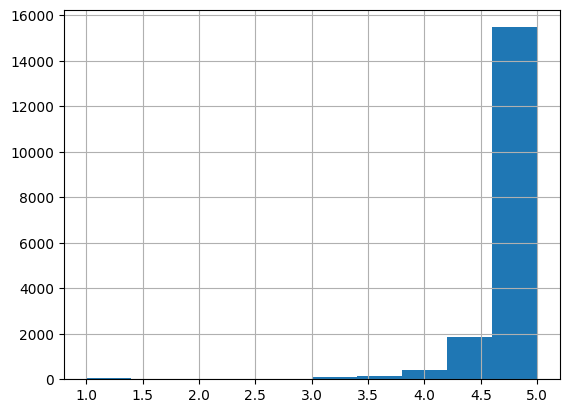

In [33]:
df.review_scores_rating.hist()

In [34]:
df.review_scores_rating.max(),df.review_scores_rating.min()

(np.float64(5.0), np.float64(1.0))

In [35]:
df['good_place'] = df['review_scores_rating'].apply(lambda x : 1 if x > 4.5 else 0 )
df.head()

host_response_rate host_acceptance_rate  host_is_superhost  \
id                                                                  
44616                100%                  92%             0.0000   
56074                100%                 100%             1.0000   
165772                92%                  93%             1.0000   
171109                87%                  89%             1.0000   
180808               100%                  97%             1.0000   

        host_listings_count  host_total_listings_count  host_has_profile_pic  \
id                                                                             
44616               13.0000                    13.0000                1.0000   
56074                1.0000                     5.0000                1.0000   
165772               5.0000                     6.0000                1.0000   
171109               3.0000                     3.0000                1.0000   
180808               2.0000                     6.0000                1.0000   

        host_identity_verified  accommodates  bathrooms  bedrooms    beds  \
id                                                                          
44616                   1.0000            14     5.5000    5.0000  8.0000   
56074                   1.0000             2     1.0000    1.0000  1.0000   
165772                  1.0000            16     5.0000    5.0000 10.0000   
171109                  1.0000             2     1.0000    1.0000  1.0000   
180808                  1.0000             2     1.5000    1.0000  1.0000   

             price  minimum_nights  maximum_nights  minimum_minimum_nights  \
id                                                                           
44616   $18,000.00               1             180                  1.0000   
56074      $591.00              15             250                 15.0000   
165772   $3,673.00               2             365                  2.0000   
171109     $321.00               4              90                  4.0000   
180808   $1,190.00               3             365                  3.0000   

        maximum_minimum_nights  minimum_maximum_nights  \
id                                                       
44616                   1.0000                180.0000   
56074                  15.0000                250.0000   
165772                  2.0000                365.0000   
171109                  4.0000                 90.0000   
180808                  3.0000               1125.0000   

        maximum_maximum_nights  minimum_nights_avg_ntm  \
id                                                       
44616                 180.0000                  1.0000   
56074                 250.0000                 15.0000   
165772                365.0000                  2.0000   
171109                 90.0000                  4.0000   
180808               1125.0000                  3.0000   

        maximum_nights_avg_ntm  has_availability  availability_30  \
id                                                                  
44616                 180.0000            1.0000               25   
56074                 250.0000            1.0000                0   
165772                365.0000            1.0000                7   
171109                 90.0000            1.0000                0   
180808               1125.0000            1.0000               16   

        availability_60  availability_90  availability_365  number_of_reviews  \
id                                                                              
44616                55               85               360                 65   
56074                28               58               333                 84   
165772               12               21               201                386   
171109                0               26               301                123   
180808               19               40               315                 62   

        n

In [36]:
df.drop(columns='review_scores_rating',axis=1,inplace=True)

In [37]:
df.good_place.value_counts(normalize=True)

good_place
1   0.8919
0   0.1081
Name: proportion, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18100 entries, 44616 to 1517372885452894606
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            18100 non-null  object 
 1   host_acceptance_rate                          18100 non-null  object 
 2   host_is_superhost                             18100 non-null  float64
 3   host_listings_count                           18100 non-null  float64
 4   host_total_listings_count                     18100 non-null  float64
 5   host_has_profile_pic                          18100 non-null  float64
 6   host_identity_verified                        18100 non-null  float64
 7   accommodates                                  18100 non-null  int64  
 8   bathrooms                                     18100 non-null  float64
 9   bedrooms                                      18

In [39]:
df['host_response_rate'] =  df['host_response_rate'].str.replace('%','',regex=False).astype(float)
df['host_acceptance_rate'] =  df['host_acceptance_rate'].str.replace('%','',regex=False).astype(float)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18100 entries, 44616 to 1517372885452894606
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            18100 non-null  float64
 1   host_acceptance_rate                          18100 non-null  float64
 2   host_is_superhost                             18100 non-null  float64
 3   host_listings_count                           18100 non-null  float64
 4   host_total_listings_count                     18100 non-null  float64
 5   host_has_profile_pic                          18100 non-null  float64
 6   host_identity_verified                        18100 non-null  float64
 7   accommodates                                  18100 non-null  int64  
 8   bathrooms                                     18100 non-null  float64
 9   bedrooms                                      18

In [41]:
df.drop(columns="price",inplace=True,axis=1)

In [42]:
df.rename(columns={'monto_limpio':'price'},inplace=True)

### MODELADO

In [43]:
target_regresor = "price"
X = df[[x for x in df.columns if x!=target_regresor]]
y = df[target_regresor]


In [44]:
kb = SelectKBest(k="all", score_func=f_regression)
kb.fit(X, y)
df_scores = pd.DataFrame(data=zip(X.columns, kb.scores_), columns=["feature", "score"]).set_index("feature").sort_values(by="score", ascending=False)
df_scores

score
feature                                               
estimated_revenue_l365d                      6882.0394
accommodates                                 5645.3148
bedrooms                                     5527.2821
bathrooms                                    4430.6457
beds                                         4049.1895
calculated_host_listings_count_entire_homes   237.6541
host_is_superhost                             171.4172
calculated_host_listings_count                146.3792
review_scores_location                        132.7705
calculated_host_listings_count_private_rooms  114.9526
host_total_listings_count                     113.1417
review_scores_cleanliness                      97.6821
host_acceptance_rate                           72.9866
calculated_host_listings_count_shared_rooms    61.6396
host_listings_count                            57.4854
review_scores_accuracy                         50.6106
dist_zocalo_km                                 47.9521
good_place                                     42.3678
instant_bookable                               30.4702
review_scores_value                            29.8704
review_scores_checkin                          29.8476
host_response_rate                             26.4430
number_of_reviews_l30d                         25.5766
reviews_per_month                              23.1113
number_of_reviews                              22.5717
dist_aicm_km                                   21.2804
availability_eoy                               20.9752
number_of_reviews_ltm                          20.7777
estimated_occupancy_l365d                      19.6051
review_scores_communication                    16.2113
minimum_nights                                 14.9362
maximum_maximum_nights                         14.7719
maximum_nights_avg_ntm                         14.7719
minimum_maximum_nights                         14.7718
availability_90                                13.5395
host_has_profile_pic                           12.4079
number_of_reviews_ly                           11.8108
availability_60                                 6.4494
availability_365                                3.5257
maximum_nights                                  2.5377
host_identity_verified                          2.0056
minimum_minimum_nights                          1.8045
availability_30                                 1.0788
minimum_nights_avg_ntm                          0.0490
maximum_minimum_nights                          0.0011
has_availability                                0.0000

In [45]:
ls_best = df_scores['score'][:10].index.to_list()
ls_best

['estimated_revenue_l365d',
 'accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'calculated_host_listings_count_entire_homes',
 'host_is_superhost',
 'calculated_host_listings_count',
 'review_scores_location',
 'calculated_host_listings_count_private_rooms']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X[ls_best], y, test_size=0.3)

In [47]:

df_metricas = evaluar_modelos_regresion(X_train, X_test, y_train, y_test)
df_metricas

/Users/vega97/Documents/diplomado_jjvv/DCD-G33-M2-P4/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+10, tolerance: 4.009e+06

/Users/vega97/Documents/diplomado_jjvv/DCD-G33-M2-P4/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+10, tolerance: 4.009e+06



Modelo  R2 Train  R2 Test     MSE Test  \
4  Regresión de Cresta Bayesiana    0.4381   0.3983 2063584.3615   
0               Regresión Lineal    0.4381   0.3982 2063633.9202   
3                Regresión Lasso    0.4381   0.3982 2063697.2221   
2     Red Elástica (Elastic Net)    0.4305   0.3893 2094339.9644   
1                 Regresión LARS    0.3707   0.3345 2282051.3280   

   Diferencia R2 (Overfitting)  
4                       0.0398  
0                       0.0399  
3                       0.0399  
2                       0.0412  
1                       0.0362

In [48]:

# Ejecución:
df_resultados = evaluar_modelos_pro(X_train, X_test, y_train, y_test)
df_resultados

--- Limpieza de Datos ---
Columnas eliminadas por redundancia: 1
Columnas finales para entrenar: 9
------------------------------


Modelo  R2 Test  R2 Train  RMSE (Error)  Estabilidad  \
0            Regresión Lineal   0.3961    0.4363     1439.0500       0.9100   
1              Regresión LARS   0.3961    0.4363     1439.0500       0.9100   
3             Regresión Lasso   0.3961    0.4362     1439.0300       0.9100   
4              Bayesian Ridge   0.3961    0.4362     1439.0400       0.9100   
2  Red Elástica (Elastic Net)   0.3715    0.4114     1468.1600       0.9000   

                        Mejores Params  
0                                   {}  
1              {'n_nonzero_coefs': 10}  
3                       {'alpha': 1.0}  
4  {'alpha_1': 1e-06, 'max_iter': 300}  
2      {'alpha': 5.0, 'l1_ratio': 0.5}

### Clasificacion

In [49]:
target_clasificador = "good_place"
X = df[[x for x in df.columns if x!=target_clasificador]]
y = df[target_clasificador]


In [50]:
kb = SelectKBest(k="all", score_func=f_classif)
kb.fit(X, y)
df_scores = pd.DataFrame(data=zip(X.columns, kb.scores_), columns=["feature", "score"]).set_index("feature").sort_values(by="score", ascending=False)
df_scores

/Users/vega97/Documents/diplomado_jjvv/DCD-G33-M2-P4/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning:

Features [19] are constant.

/Users/vega97/Documents/diplomado_jjvv/DCD-G33-M2-P4/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning:

invalid value encountered in divide



score
feature                                                
review_scores_value                          11364.3175
review_scores_accuracy                       10444.7817
review_scores_cleanliness                     9339.3767
review_scores_communication                   7341.7655
review_scores_checkin                         6200.8159
review_scores_location                        3190.3330
host_is_superhost                             1449.6139
estimated_occupancy_l365d                      944.5869
number_of_reviews                              620.1168
calculated_host_listings_count_private_rooms   530.9723
number_of_reviews_ly                           526.1881
number_of_reviews_ltm                          519.3413
calculated_host_listings_count_shared_rooms    394.1402
estimated_revenue_l365d                        385.7079
reviews_per_month                              372.9600
instant_bookable                               226.3015
number_of_reviews_l30d                         211.2648
calculated_host_listings_count                 189.9865
availability_60                                184.6733
host_response_rate                             177.3714
availability_30                                175.7868
availability_eoy                               157.2418
availability_90                                156.3215
host_acceptance_rate                           135.2130
availability_365                               111.0174
host_listings_count                             56.6766
calculated_host_listings_count_entire_homes     50.6231
price                                           42.3678
host_total_listings_count                       35.8596
bathrooms                                       26.0263
accommodates                                    13.1619
dist_zocalo_km                                  10.2929
beds                                             6.6759
host_has_profile_pic                             5.1893
bedrooms                                         3.9070
minimum_nights                                   3.7536
maximum_minimum_nights                           2.7662
host_identity_verified                           1.8269
minimum_maximum_nights                           1.2123
maximum_nights_avg_ntm                           1.2123
maximum_maximum_nights                           1.2123
maximum_nights                                   0.7169
minimum_nights_avg_ntm                           0.2163
minimum_minimum_nights                           0.0442
dist_aicm_km                                     0.0029
has_availability                                    NaN

In [51]:
ls_best = df_scores['score'][:10].index.to_list()
ls_best

['review_scores_value',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_checkin',
 'review_scores_location',
 'host_is_superhost',
 'estimated_occupancy_l365d',
 'number_of_reviews',
 'calculated_host_listings_count_private_rooms']

In [52]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X[ls_best], y, test_size=0.3)

In [53]:


tabla_clasificacion = evaluar_clasificadores_pro(X_train_, X_test_, y_train_, y_test_)
tabla_clasificacion

Modelo  Accuracy (Exactitud)  F1 Score (Equilibrio)  \
7    Gradient Boosting                0.9600                 0.9776   
4   Red Neuronal (MLP)                0.9589                 0.9770   
5        Random Forest                0.9589                 0.9770   
0  Regresión Logística                0.9545                 0.9747   
6             AdaBoost                0.9549                 0.9747   
2                  KNN                0.9543                 0.9745   
3    Árbol de Decisión                0.9545                 0.9745   
1          Naive Bayes                0.9392                 0.9653   

   ROC AUC (Separación)                          Mejores Params  
7                0.9843                  {'learning_rate': 0.1}  
4                0.9811           {'hidden_layer_sizes': (50,)}  
5                0.9840  {'max_depth': 10, 'n_estimators': 200}  
0                0.9733                              {'C': 0.1}  
6                0.9810                   {'n_estimators': 100}  
2                0.9501                      {'n_neighbors': 7}  
3                0.9642                        {'max_depth': 5}  
1                0.9661                                      {}